In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from scipy.stats import multivariate_normal
target = multivariate_normal(mean=[4,4], cov=[[1,0.8],[0.8,1]])

In [3]:
def sample_from_gaussian(mean,cov):
    return np.random.multivariate_normal(mean, cov, 1).T

In [4]:
def plotter(samples, target):
    x, y = np.mgrid[0:10:.1, 0:10:.1]
    data = np.dstack((x, y))
    samples = np.array(samples)
    z = target.pdf(data)
    plt.contourf(x, y, z, cmap='coolwarm')
    plt.scatter(samples[:,0],samples[:,1],color= "white",s=1);
    plt.show()

In [5]:
def work(cov):
    drawn = 0
    accepted = 0
    samples = []
    curr = [0,0]
    p = 0
    while accepted < 10000:
        sample = sample_from_gaussian(curr,cov)
        sample = [sample[0][0],sample[1][0]]
        dist1 = multivariate_normal(mean=curr, cov=cov)
        dist2 = multivariate_normal(mean=sample, cov=cov)
        A = (target.pdf(sample)/target.pdf(curr))*(dist2.pdf(curr)/dist1.pdf(sample))
        u = np.random.uniform(0.0,1.0)
        if ( A > u):
            samples.append(sample)
            curr = sample
            accepted = accepted + 1
        drawn = drawn + 1
        if(accepted == 100 and p == 0):
            plotter(samples,target)
            p = p + 1
        if(accepted == 1000 and p == 1):
            plotter(samples,target)
            p = p + 1
        if(accepted == 10000 and p == 2):
            plotter(samples,target)
            p = p + 2
    acc_rate = 1.0*10000/drawn
    print("Acceptance rate : " + str(acc_rate))
    return samples, drawn

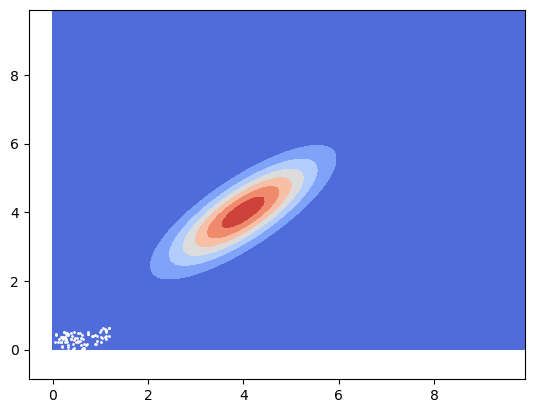

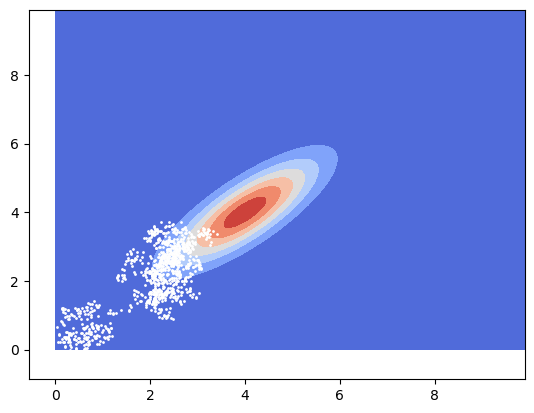

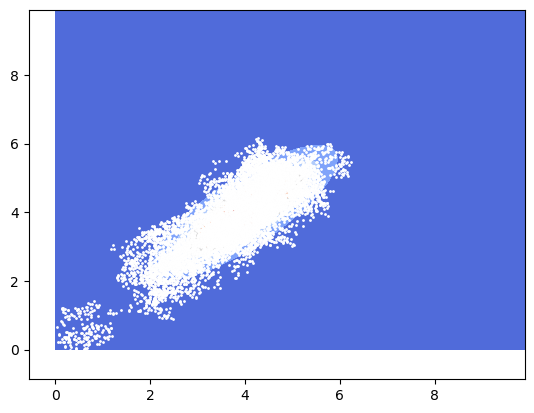

Acceptance rate : 0.9216589861751152


In [6]:
samples,drawn = work([[0.01,0],[0,0.01]])

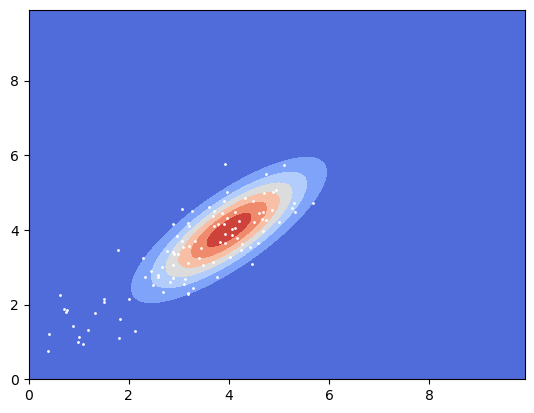

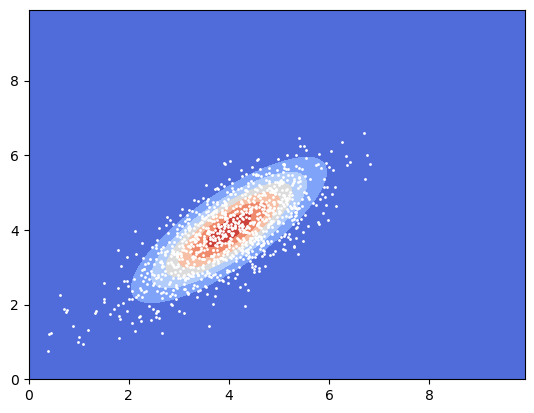

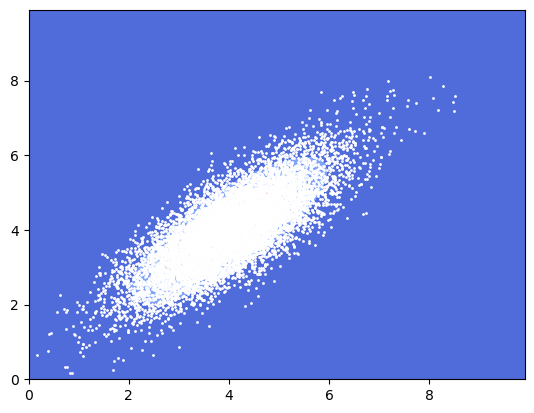

Acceptance rate : 0.4024954719259408


In [7]:
samples,drawn = work([[1,0],[0,1]])

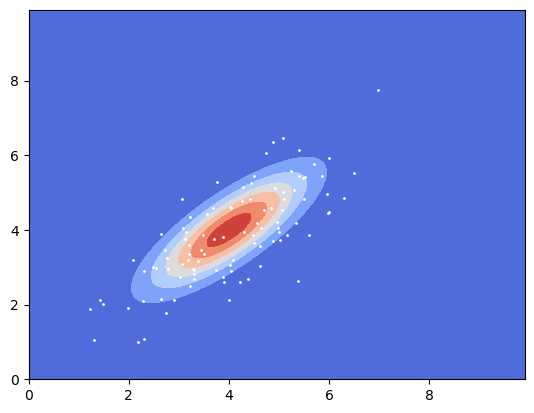

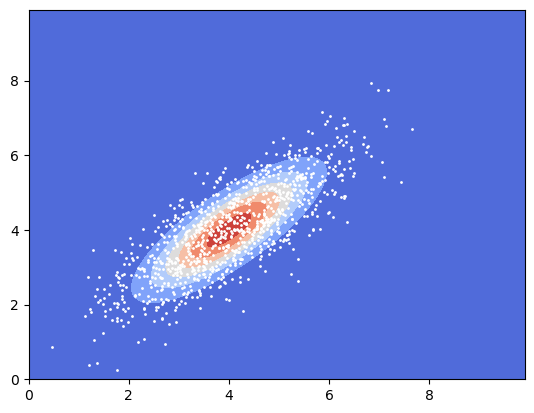

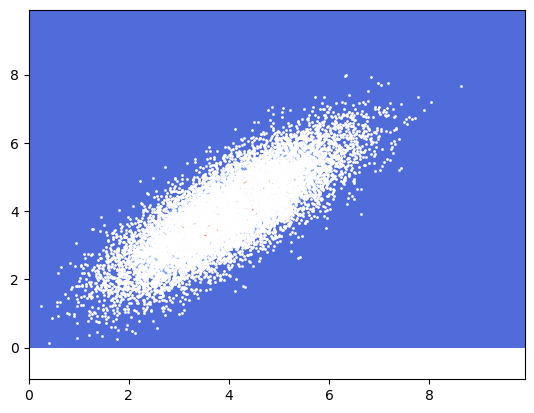

Acceptance rate : 0.011658422219087403


In [8]:
samples,drawn = work([[100,0],[0,100]])